# 1
Consider the second condition that a basis must satisfy:
if $B_1, B_2 \in \mathcal{B}$ and $x \in B_1 \cap B_2$, then there exists a $B3 \subset B_1 \cap B_2$ such that $x \in B_3$.

Now lets take 2 intervals $(2, 3)$ and $(3, 4)$, which intersect on $3$. In this case, we cannnot find a $B3$(a closed interval)$\subset B1 \cap B_2$ that satisfies the above condition.Therefore, this is not a valid bases for a topology on ${\rm I\!R}$.

# 2
The basis $\mathcal{B_A}$ given by the metric restricted to $A$ is the collection of open balls $B(x, r) = \{y \in A: d(x, y) < r\}$ for all $x \in A, r \in {\rm I\!R}$

The basis $\mathcal{B}$ given by $d$ is the collection of open balls $B(x, r) = \{y \in X: d(x, y) < r\}$ for all $x \in X, r \in {\rm I\!R}$

The subspace topology $\mathcal{T'}$ on $A$ consists of open sets $U \cap A$ for all $U \in \mathcal{T}$, where $\mathcal{T}$ is a topology on $X$ generated by $\mathcal{B}$. Since every $U \in \mathcal{T}$ is a union of open balls in $\mathcal{B}$, every $U' = U \cap A \in \mathcal{T'}$ is a union of the intersection of $A$ and a open ball in $B$, meaning $U'$ can be expressed as a union of open balls in $\mathcal{B_A}$

# 3-a

In [2]:
# Stereographic projection
import math
def project(arr):
    x = arr[0]
    y = arr[1]
    z = arr[2]
    return x/(1-z), y/(1-z)
def projectPolar(arr):
    phi = arr[0]
    theta = arr[1]
    return [math.sin(phi)/(1-math.cos(phi)), theta]


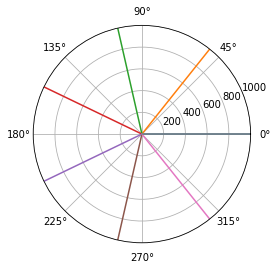

In [3]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# sns.set(style="darkgrid")
thetas = np.linspace(0,math.pi*2, 8)

for theta in thetas:
    # Generate points on the latitude line
    phis = np.linspace(0.001, math.pi, 100)
    thetas1 = np.linspace(theta, theta, 100)
    line = np.array([[phi, theta1] for phi, theta1 in zip(phis, thetas1)])
    #project on to plane
    projectedLine = np.apply_along_axis(projectPolar, 1, line)
    plt.polar(projectedLine[:, 1], projectedLine[:, 0])

ax=plt.gca()
ax.set_rlim(0, 1000)
plt.show()

# 3-b

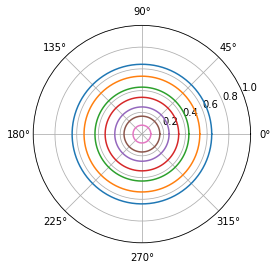

In [3]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

phis = np.linspace(2,math.pi, 8)
lines = []
for phi in phis:
    # Generate points on the longitude line
    phis1 = np.linspace(phi, phi, 100)
    thetas1 = np.linspace(0, math.pi*2, 100)
    line = np.array([[phi, theta1] for phi, theta1 in zip(phis1, thetas1)])
    # project onto plane
    projectedLine = np.apply_along_axis(projectPolar, 1, line)
    plt.polar(projectedLine[:, 1], projectedLine[:, 0])

ax=plt.gca()
ax.set_rlim(0, 1)
plt.show()

# 3-c

In [4]:
def getRotationMatrixAroundX(degree):
    theta = np.radians(degree)
    return np.array([
         [1, 0, 0],
         [0, math.cos(theta), -math.sin(theta)],
         [0, math.sin(theta), math.cos(theta)]
    ])

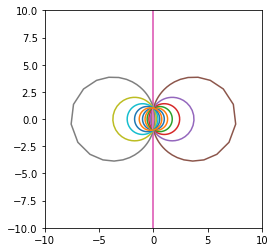

In [5]:
# Generate points on the circle on the x-y plane
tArr = np.linspace(0, 2*math.pi, 100)
points = np.array([[math.cos(t), math.sin(t), 0] for t in tArr])
angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165]
for angle in angles:
    rotatedPoints = points.dot(np.transpose(getRotationMatrixAroundX(angle)))
    projectedPoints = np.apply_along_axis(project,1, rotatedPoints)
    plt.plot(projectedPoints[:, 1], projectedPoints[:, 0])
plt.axis('scaled')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# 4-a

In [6]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

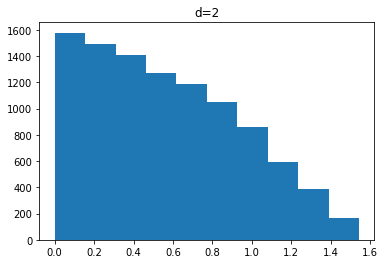

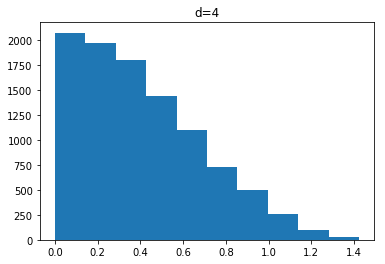

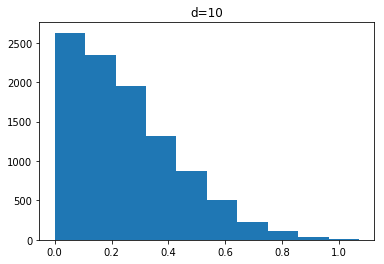

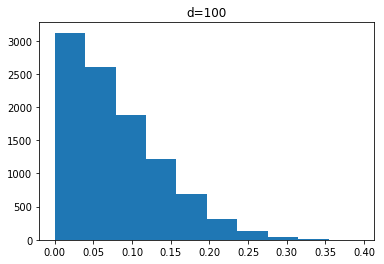

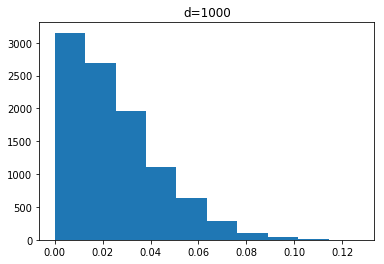

In [7]:
dArr = [2, 4, 10, 100, 1000]
for d in dArr:
    x = []
    for i in range(10000):
        samplePoint = normalize(np.random.normal(0, 1, d+1))
        pointOnGreateCircle = np.array(samplePoint)
        pointOnGreateCircle[0] = 0
        pointOnGreateCircle = normalize(pointOnGreateCircle)
        arcDistance = math.acos(samplePoint.dot(pointOnGreateCircle))
        x.append(arcDistance)
    plt.hist(x)
    plt.title("d={}".format(d))
    plt.show()

As d increases, the arc distance is more likely to be smaller (close to 0) This means as d increases, randomly selected points on the sphere are more likely to sit close to a great circle and the distance distribution is more concentrated towards 0.Even if we used a different great circle, the result would still be the same because if we could get any great circle by rotating the one we just used and that wouldn't affect the distribution of its distance from a randomly selected point on the sphere.

# 4-b

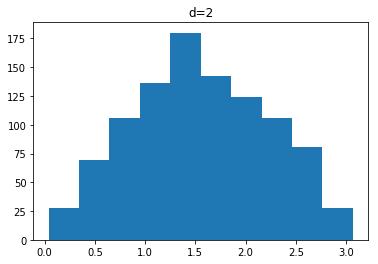

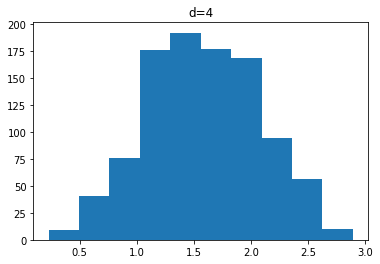

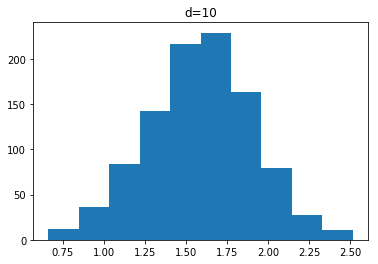

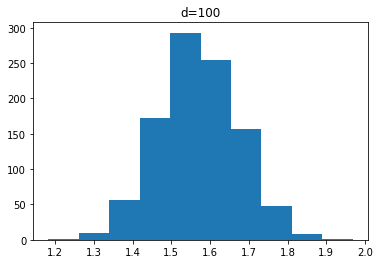

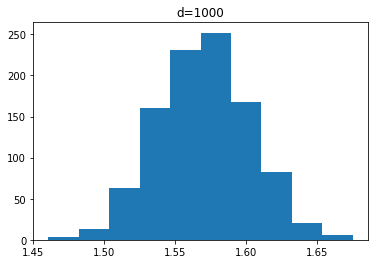

In [8]:
dArr = [2, 4, 10, 100, 1000]
for d in dArr:
    x = []
    for i in range(1000):
        samplePoint = normalize(np.random.normal(0, 1, d+1))
        samplePoint2 = normalize(np.random.normal(0, 1, d+1))
        arcDistance = math.acos(samplePoint.dot(samplePoint2))
        x.append(arcDistance)
    plt.hist(x)
    plt.title("d={}".format(d))
    plt.show()

As in the previous question, as d increases, the distance distribution becomes more concentrated